# INSTALACJA BIBLIOTEK

(trwa około 3 min)

In [1]:
!pip install torch facenet_pytorch tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19

##Load Data from kaggle

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amiralikalbasi/images-of-friends-character-for-face-recognition")

print("Path to dataset files:", path)

100%|██████████| 43.1M/43.1M [00:02<00:00, 16.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/amiralikalbasi/images-of-friends-character-for-face-recognition/versions/1


In [2]:
import os
data_path = '/root/.cache/kagglehub/datasets/amiralikalbasi/images-of-friends-character-for-face-recognition/versions/1/Friends'
for path, dirs, files in os.walk(data_path):
  print(path)
  for d in dirs:
    print(d)

/root/.cache/kagglehub/datasets/amiralikalbasi/images-of-friends-character-for-face-recognition/versions/1/Friends
Test
Train
/root/.cache/kagglehub/datasets/amiralikalbasi/images-of-friends-character-for-face-recognition/versions/1/Friends/Test
/root/.cache/kagglehub/datasets/amiralikalbasi/images-of-friends-character-for-face-recognition/versions/1/Friends/Train
Phoebe
Rachel
Ross
Chandler
Joey
Monica
/root/.cache/kagglehub/datasets/amiralikalbasi/images-of-friends-character-for-face-recognition/versions/1/Friends/Train/Phoebe
/root/.cache/kagglehub/datasets/amiralikalbasi/images-of-friends-character-for-face-recognition/versions/1/Friends/Train/Rachel
/root/.cache/kagglehub/datasets/amiralikalbasi/images-of-friends-character-for-face-recognition/versions/1/Friends/Train/Ross
/root/.cache/kagglehub/datasets/amiralikalbasi/images-of-friends-character-for-face-recognition/versions/1/Friends/Train/Chandler
/root/.cache/kagglehub/datasets/amiralikalbasi/images-of-friends-character-for-fa

#FACE DETECTION AND RECOGNITION

##Detekcja twarzy
**MTCNN** (Multi-Task Cascaded Convolutional Neural Networks), który potrafi wykrywać twarze i charakterystyczne cechy twarzy na obrazach i służy do wykrywania i przycinania twarzy pojawiających się na ekranie przed przekazaniem danych wyjściowych do następnego modelu.


**Note:** Elementy listy **threshold** w modelu MTCNN  reprezentują wartości progowe, które służą do filtrowania wyników na każdym etapie sieci MTCNN (P-Net — odrzuca obszary niebędące twarzami, R-Net — uściśla wyniki i odrzuca fałszywe alarmy, a O-Net — wykrywa granice twarzy i punkty kluczowe). Progi określają minimalny poziom pewności wymagany, aby twarz została uznana za prawidłową na każdym etapie.

## Rozpoznanie twarzy
**InceptionResnet,** sieć neuronowa trenowana na dużym zbiorze danych rozpoznawania twarzy (VGGFace2), która może generować osadzenia rozmiaru 512 na podstawie cech twarzy.

In [3]:
import os
import cv2
import torch
from facenet_pytorch import InceptionResnetV1, MTCNN
from tqdm import tqdm
from types import MethodType

### helper function

#build embeddings for face images
def encode(img):
    res = resnet(torch.Tensor(img))
    return res


def detect_box(self, img, save_path=None):
    # Detect faces
    batch_boxes, batch_probs, batch_points = self.detect(img, landmarks=True)
    # Select faces
    if not self.keep_all:
        batch_boxes, batch_probs, batch_points = self.select_boxes(
            batch_boxes, batch_probs, batch_points, img, method=self.selection_method
        )
    # Extract faces
    faces = self.extract(img, batch_boxes, save_path)
    return batch_boxes, faces

### load model
resnet = InceptionResnetV1(pretrained='vggface2').eval()
# image_size {int} -- Output image size in pixels. The image will be square. (default: {160})
# min_face_size {int} -- Minimum face size to search for. (default: {20})
# thresholds {list} -- MTCNN face detection thresholds (default: {[0.6, 0.7, 0.7]})

mtcnn = MTCNN(
  image_size=160, keep_all=True, thresholds=[0.6, 0.6, 0.6], min_face_size=30
)
mtcnn.detect_box = MethodType(detect_box, mtcnn)

  0%|          | 0.00/107M [00:00<?, ?B/s]

#GENEROWNIE OSADZIEN (EMBEDDINGS)

Po załadowaniu wymaganych modeli możemy przejść do generowania wektorowych reprezentacji naszych zapisanych obrazów.

Poniższy kod ma na celu:
-  odczytanie obrazów z określonego katalogu,
- wykrywanie twarzy na tych obrazach za pomocą MTCNN
- i kodowanie twarzy za pomocą modelu InceptionResnet.

Powstałe osadzenia twarzy są przechowywane w słowniku all_people_faces, gdzie klucze to nazwiska osób na obrazach, a wartości to odpowiadające im osadzenia twarzy.

In [4]:
import os
from skimage.transform import resize
from PIL import Image
from numpy import asarray, expand_dims, dot
from numpy.linalg import norm
import math
from math import floor

def faces_from_folders(folder):

    extracted_faces = []

    for filename in os.listdir(folder):
        if filename.split('.')[1] in ['jpg', 'jpeg']:
          image_path =os.path.join(folder,filename)
          img = cv2.imread(image_path)
          cropped = mtcnn(img)
          if cropped is not None:
                extracted_faces.append(encode(cropped)[0, :])

    return extracted_faces

def loading_images(folder):
    X = [] ; y = []

    for sub_folder in tqdm(os.listdir(folder)):

        image_path = os.path.join(folder, sub_folder)
        faces = faces_from_folders(image_path)
        labels = [sub_folder for _ in range(len(faces))]

        print('Loaded %d samples for character: %s' % (len(faces), sub_folder))

        X.extend(faces)
        y.extend(labels)

    return X, y


# load train dataset
train_folder = os.path.join(data_path, 'Train')
X, y = loading_images(train_folder)
print(len(X), len(y))

 17%|█▋        | 1/6 [00:25<02:09, 25.88s/it]

Loaded 48 samples for character: Phoebe


 33%|███▎      | 2/6 [00:45<01:29, 22.49s/it]

Loaded 47 samples for character: Rachel


 50%|█████     | 3/6 [01:07<01:05, 21.99s/it]

Loaded 45 samples for character: Ross


 67%|██████▋   | 4/6 [01:21<00:37, 18.88s/it]

Loaded 44 samples for character: Chandler


 83%|████████▎ | 5/6 [01:35<00:17, 17.12s/it]

Loaded 48 samples for character: Joey


100%|██████████| 6/6 [01:49<00:00, 18.30s/it]

Loaded 44 samples for character: Monica
276 276


##Wizualizacja osadzeń twarz

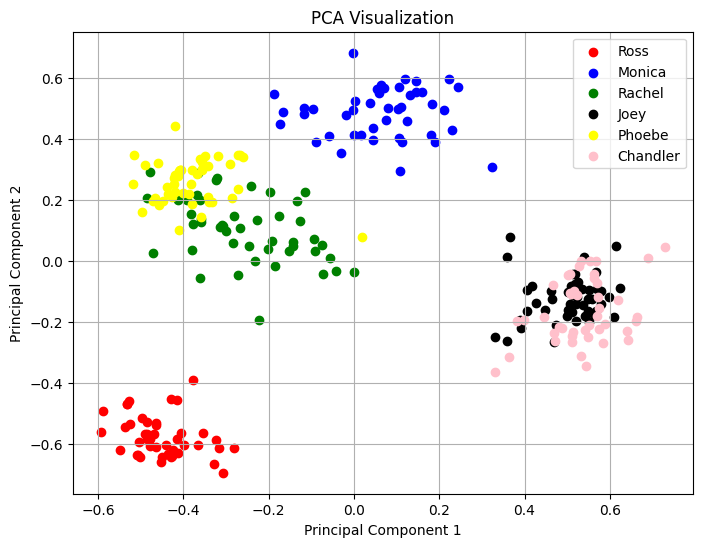

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
def label2cls(y, y_map):
  return [y_map.index(name) for name in y]

X_array = [tensor.detach().numpy() for tensor in X]
y_map = ['Ross', 'Monica', 'Rachel', 'Joey','Phoebe','Chandler']
y_cls = label2cls(y, y_map)

# Преобразование PCA до 2 компонентов
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_array)

# Цвета для классов
colors = ['red', 'blue', 'green', 'black', 'yellow', 'pink']
unique_classes = np.unique(y_cls)

# Визуализация
plt.figure(figsize=(8, 6))
for class_id in unique_classes:
    plt.scatter(X_pca[y_cls == class_id, 0], X_pca[y_cls == class_id, 1],
                label=f'{y_map[class_id]}', c=colors[class_id])

plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


#SPLIT DATA FOR TRAINING AND TESTING

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
y_test

['Rachel',
 'Rachel',
 'Joey',
 'Chandler',
 'Phoebe',
 'Rachel',
 'Rachel',
 'Chandler',
 'Ross',
 'Monica',
 'Monica',
 'Ross',
 'Ross',
 'Joey',
 'Chandler',
 'Ross',
 'Ross',
 'Rachel',
 'Monica',
 'Phoebe',
 'Phoebe',
 'Ross',
 'Rachel',
 'Rachel',
 'Chandler',
 'Monica',
 'Monica',
 'Phoebe',
 'Rachel',
 'Ross',
 'Monica',
 'Joey',
 'Phoebe',
 'Monica',
 'Monica',
 'Ross',
 'Rachel',
 'Monica',
 'Monica',
 'Chandler',
 'Phoebe',
 'Joey',
 'Joey',
 'Phoebe',
 'Chandler',
 'Monica',
 'Chandler',
 'Rachel',
 'Phoebe',
 'Rachel',
 'Joey',
 'Monica',
 'Chandler',
 'Chandler',
 'Rachel',
 'Chandler']

In [7]:
X_train[0]

tensor([ 4.1748e-02, -1.8230e-02,  6.7098e-02, -2.4788e-02,  5.4589e-02,
         8.2639e-02, -7.2666e-02, -2.2562e-02, -8.8620e-03, -3.4262e-02,
        -1.8531e-02, -2.5823e-02,  9.5599e-03,  3.0519e-02,  6.0264e-02,
         3.2281e-02, -2.5255e-02,  3.7369e-02, -5.1881e-03, -3.4349e-04,
         1.5030e-02, -7.0319e-02, -1.2856e-02,  3.0852e-02,  2.2460e-02,
         5.3799e-02, -3.2631e-02,  4.2735e-02,  1.2503e-02, -2.1780e-02,
        -6.5455e-03, -3.1595e-02, -9.6667e-03,  4.1366e-02,  4.3389e-02,
        -1.0407e-02,  6.5496e-02, -2.4138e-03, -2.4299e-02, -1.3633e-02,
         2.6379e-02, -3.0793e-02, -2.4406e-02, -3.7538e-02,  3.7196e-02,
        -1.4306e-02,  2.4982e-02, -4.3647e-02, -3.1021e-03,  2.5485e-02,
         3.2136e-02, -1.2078e-02, -2.2861e-02,  7.2765e-03, -4.5464e-03,
        -6.0688e-03, -2.1753e-02, -2.1591e-02, -2.7741e-03,  1.1608e-02,
        -1.3343e-02, -1.1327e-02, -8.0138e-02,  3.3093e-02, -7.2636e-02,
        -3.3425e-02,  1.1532e-02,  5.4645e-02,  2.0

In [8]:
X_train_array = [tensor.detach().numpy() for tensor in X_train]
X_test_array = [tensor.detach().numpy() for tensor in X_test]


#ML MODEL TRAINING

**SVC(Support Vector CLassifier)** model z biblioteki sklearn - implementacja techniki ** Support Vector Machine** (maszyny wektorow wspierających) nadzorowanego uczenia maszynowego.

 Algorytm ten konstruuje hiperpłaszczyznę, która maksymalizuje margines między różnymi klasami w danych. Polega na idei znalezienia hiperpłaszczyzny, która najlepiej dzieli zestaw danych na dwie klasy



In [9]:
import numpy as np
from sklearn.svm import SVC
clf = SVC(probability=True)
clf.fit(X_train_array, y_train)


SVC(probability=True)

##Predykcja modelu

In [10]:
print(y_train[5:10])
clf.predict(X_train_array[5:10])

['Rachel', 'Phoebe', 'Rachel', 'Joey', 'Joey']


array(['Rachel', 'Phoebe', 'Rachel', 'Joey', 'Joey'], dtype='<U8')

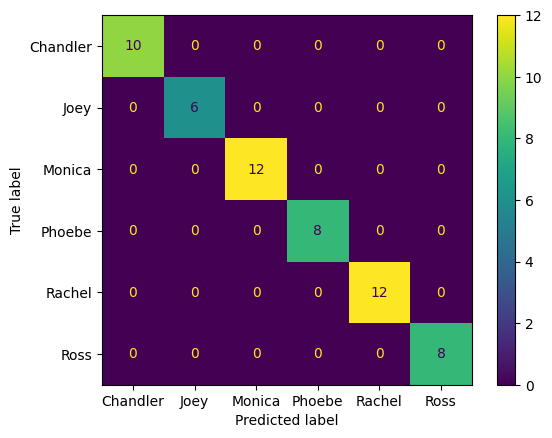

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_test_array, y_test, )

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test_array)))



              precision    recall  f1-score   support

    Chandler       1.00      1.00      1.00        10
        Joey       1.00      1.00      1.00         6
      Monica       1.00      1.00      1.00        12
      Phoebe       1.00      1.00      1.00         8
      Rachel       1.00      1.00      1.00        12
        Ross       1.00      1.00      1.00         8

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



#Testowanie modelu

{0: 'Chandler', 1: 'Joey', 2: 'Monica', 3: 'Phoebe', 4: 'Rachel', 5: 'Ross'}


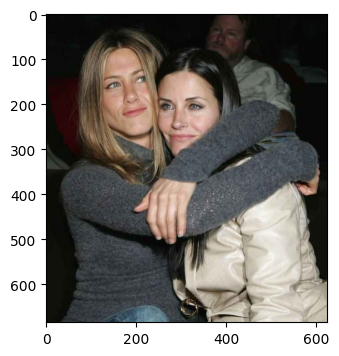

In [13]:
import matplotlib.pyplot as plt

def plot(img):
    plt.figure(figsize=(8,4))
    plt.imshow(img[:,:,::-1])
    plt.show()

label_map = {}
for index, name in enumerate(clf.classes_):
    label_map[index] = name

print(label_map)

test_path = '/root/.cache/kagglehub/datasets/amiralikalbasi/images-of-friends-character-for-face-recognition/versions/1/Friends/Test'
for filename in os.listdir(test_path)[:1]:
  img = cv2.imread(os.path.join(test_path, filename))
  plot(img)

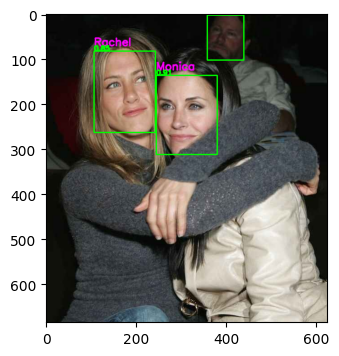

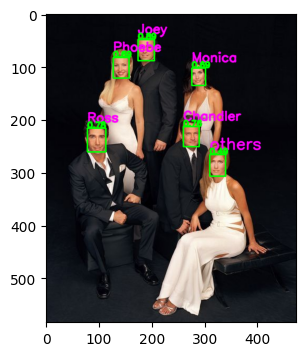

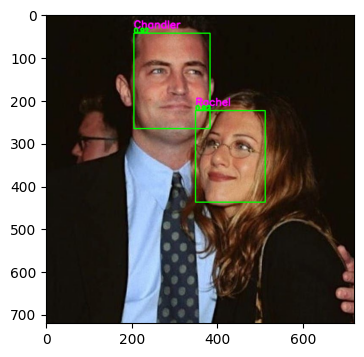

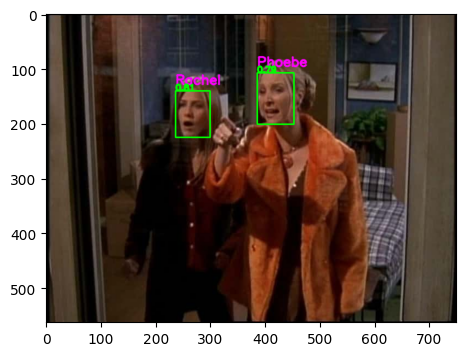

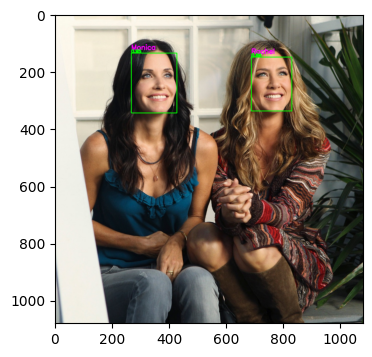

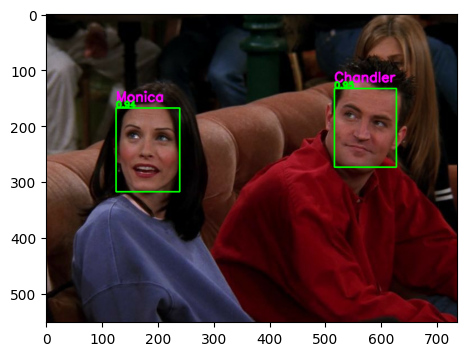

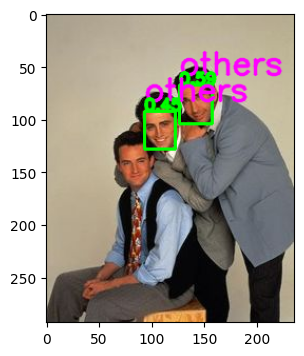

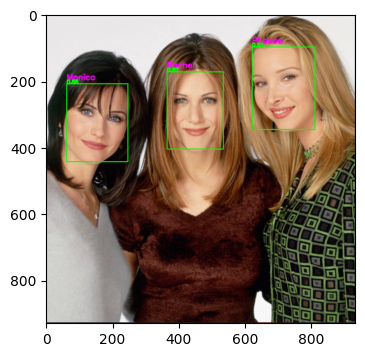

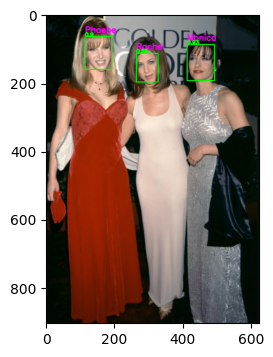

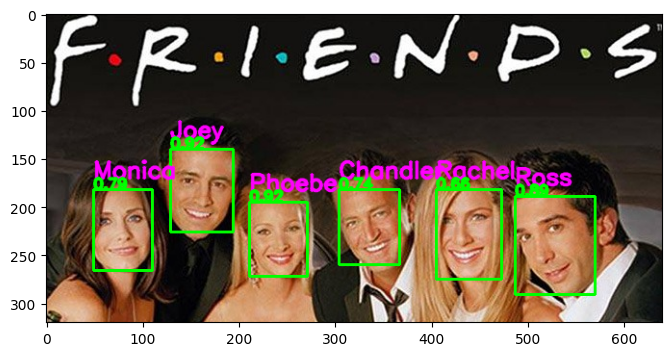

In [15]:

test_path = '/root/.cache/kagglehub/datasets/amiralikalbasi/images-of-friends-character-for-face-recognition/versions/1/Friends/Test'
for filename in os.listdir(test_path)[:10]:
  img = cv2.imread(os.path.join(test_path, filename))
  bbox, cropped = mtcnn.detect_box(img)

  for i in range(bbox.shape[0]):
        x1, y1, x2, y2 = [round(coord) for coord in bbox[i]]
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        # roi_color = img[y1:y2, x1:x2, :]
        per_prob  = clf.predict_proba(encode(cropped)[i, :].detach().numpy().reshape(1, -1))
        if np.max(per_prob) >=0.6:
            name=label_map[np.argmax(per_prob)]
            img=cv2.putText(img,name,(x1,y1-12),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,255),2,cv2.LINE_AA)
            img=cv2.putText(img,str(round(np.max(per_prob),2)),(x1,y1-1),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0, 255, 0),2,cv2.LINE_AA)
        else:
            img=cv2.putText(img,'others',(x1,y1-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,255),2,cv2.LINE_AA)
            img=cv2.putText(img,str(round(np.max(per_prob),2)),(x1,y1-1),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0, 255, 0),2,cv2.LINE_AA)

    # cv2.imwrite(folder+frame_path.split('/')[-1].split('.')[0]+'_facenet_pred.jpg',image)
  plot(img)
